<a href="https://colab.research.google.com/github/AwesomeBOBmusic/DataVisualization/blob/main/DataEngineeringM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Look and examine the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# read file from google drive as it is too large to upload and read on colab
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/zomato.csv'
df = pd.read_csv(file_path)

#df = pd.read_csv('zomato.csv')

# Row and category (false/true)
nullValues = df.isnull()

# Null amount for each category
nullSum = df.isnull().sum()

# Types of the categories
columnTypes = df.info()

# Shows the minimum
valuesMin = df.describe()

# Percent of missing data
missing_data_count = df.isnull().sum().sum()
all_data_count = np.product(df.shape)
missing = (missing_data_count/all_data_count)*100

# Calculate the percentage of missing data for each column
missing_percentage = (nullSum / len(df)) * 100
# Identify columns with a high percentage of missing values (e.g., > 50%)
high_missing_cols = missing_percentage[missing_percentage > 50].index.tolist()

#print(nullValues)
#print("Null Value Counts:\n", nullSum)
print("Types of categories:\n", columnTypes)
#print("Ranges and minimum:\n", valuesMin)
#print("Missing percentage:\n", missing)
#print("\nColumns with >50% Missing Values:\n", high_missing_cols)
#print("\nData Types:\n", df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines        

In [ ]:
print(df.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Example: Check for inconsistencies in the 'rate' column (assuming it's a rating)
# You might want to check if the rating is within a certain range or consistent format
if 'rate' in df.columns:
    print("\nUnique values in 'rate' column:\n", df['rate'].unique())
    # Further analysis, e.g. for invalid characters like '-' or 'NEW'
    print("\nInvalid rating entries: \n", df[df['rate'].str.contains('-|NEW', na=False)])

# Example: Check for inconsistent entries in a categorical column like 'city'
if 'city' in df.columns:
    print("\nUnique values in 'city' column:\n", df['city'].unique())
    # Look for typos, variations in capitalization, etc
    city_counts = df['city'].value_counts()
    print("\nCity counts:\n", city_counts) # identify city names with low counts
# Add more checks for other columns and anomalies as needed

#Overall Summary
print("\nSummary of Anomalies and Patterns:")
print("- Columns with significant missing values:", high_missing_cols)
#Add points summarizing other identified inconsistencies or patterns


Unique values in 'rate' column:
 ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']

Invalid rating entries: 
                                                      url  \
72     https://www.zomato.com/bangalore/spicy-tandoor...   
75     https://www.zomato.com/bangalore/om-sri-vinaya...   
110    https://www.zomato.com/bangalore/hari-super-sa...   
130    https://www.zomato.com/bangalore/roll-magic-fa...   
131    https://www.zomato.com/bangalore/foodlieious-m...   
...                          

In [ ]:
# Look for unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

url: ['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMTg2NjEwODQiLCIxODY5MDgzNyJdLCJ0IjoiUHVicyAmYW1wOyBCYXJzIGluIFdoaXRl

In [ ]:
# check for null values in each feature
print(df.isnull().sum())

# check for duplicates
print('')
print(df.duplicated().sum())

# info about dataset
print('')
print(df.info())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name        

# **Cleaning data:**

In [ ]:
# clean the url feature
from urllib.parse import urlparse, urlunparse

def clean_url(url):
    # parse url into components
    parsed = urlparse(url)

    # ensure scheme is HTTPS
    scheme = 'https'

    # normalize netloc as www.zomato
    if parsed.netloc != 'www.zomato.com':
        netloc = parsed.netloc
    else:
        netloc = 'www.zomato.com'

    # normalize path by removing extra spaces
    path = parsed.path.strip()

    # keep params and the remaining parameters required for the urlparse function the same
    params = parsed.params
    query = parsed.query
    fragment = parsed.fragment

    # construct the cleaned URL
    cleaned_url = urlunparse((scheme, netloc, path, params, query, fragment))

    # replace spaces with %20
    cleaned_url = cleaned_url.replace(' ' , '%20')

    return cleaned_url

df['clean_url'] = df['url'].apply(clean_url)

df['url'] = df['clean_url']
df.drop('clean_url' , axis = 1 , inplace = True)

clean the url to ensure consistency between all the urls in the dataset. the urlparse functions helps us to split the cleaning aspect to clean each part of the url. the scheme is used to ensure the scheme used for the urls remains https for all of them. the netloc checks the domain name of the website which is www.zomato.com in this case. the strip method removes any trailing spaces in the url. the params, query and fragment are kept the same. finally, all of these are joined together to reform a cleaned url.

In [ ]:
# remove extra spaces and trim trailing spaces in the name feature
df['name'] = df['name'].str.strip().str.replace(r'\s+' , ' ' , regex = True)

removes any trailing spaces from the name feature to ensure consistnecy in all values of the feature

In [ ]:
# check null and na values
print(df['online_order'].isnull().sum())
print(df['online_order'].isna().sum())

print(df['book_table'].isnull().sum())
print(df['book_table'].isna().sum())

# convert from object to boolean
df['online_order'] = df['online_order'].map({'Yes': True , 'No': False})
df['book_table'] = df['book_table'].map({'Yes': True , 'No': False})

# check changes
print(df['online_order'].dtype)
print(df['book_table'].dtype)

0
0
0
0
bool
bool


since order_online and book_table have boolean values, check if there are any na or null values. the dtype of them in the .info() was object so i converted them to boolean type and ensured the change was made

In [ ]:
# check all possible values in the feature
print(df['rate'].unique())
print(df['rate'].value_counts())
print((df['rate'] == '-').sum())

# ensure rate is of string type before using .str
df['rate'] = df['rate'].astype(str)

# remove the /5 and only keep the rating
df['rate'] = df['rate'].str.split('/').str[0]

# replace value NEW with rating 0
df['rate'] = df['rate'].replace('NEW' , '0')

# replace value - with nan , to be replaced with the mean
df['rate'] = df['rate'].replace('-', np.nan)

# rnsure rate is numeric after removing '/5' and replacing 'NEW'
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# replace nan values with the mean
df['rate'] = df['rate'].fillna(df['rate'].mean())

# round to 2 decimal places
df['rate'] = df['rate'].round(2)

df['rate'] = df['rate'].astype(float)

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64
69


In [ ]:
# fill missing values
df['phone'] = df['phone'].fillna('Not Available')

# replace line breaks with commas and remove spaces
df['phone'] = df['phone'].str.replace(r'\r\n' , ' , ' , regex=True)
df['phone'] = df['phone'].str.replace(r'\s+', '' , regex=True)

def clean_phone_number(phone):
    # replace invalid entries with nan
    if phone.startswith(('NotA', '000', '004', '006', '007', '008', '009')):
        return np.nan

    # normalize indian mobile numbers
    if phone.startswith('091'):
        return phone.replace('091' , '+91' , 1)

    # keep valid international or regional numbers
    if phone.startswith(('+91', '080', '022', '1800')):
        return phone

    # Mark other prefixes as invalid
    return np.nan

df['cleaned_phone'] = df['phone'].apply(clean_phone_number)
df['cleaned_phone'].fillna('Not Available', inplace=True)

# check unique prefixes after cleaning
print("Unique prefixes (first 3 chars):", df['cleaned_phone'].str.slice(0, 3).value_counts())
print("Unique prefixes (first 4 chars):", df['cleaned_phone'].str.slice(0, 4).value_counts())

# set cleaned column to phone column
df['phone'] = df['cleaned_phone']
df.drop('cleaned_phone' , axis = 1 , inplace = True)

Unique prefixes (first 3 chars): cleaned_phone
+91    35513
080    14405
Not     1629
180      125
022       45
Name: count, dtype: int64
Unique prefixes (first 4 chars): cleaned_phone
+919    20065
0804     9409
+918     9146
+917     5788
0802     3733
Not      1629
0806      666
+916      514
0803      458
1800      125
0807      113
0223       45
0805       24
0808        2
Name: count, dtype: int64


<ipython-input-10-377026eced0d>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cleaned_phone'].fillna('Not Available', inplace=True)


In [ ]:
df['filled_location'] = df.groupby('listed_in(city)')['location'].transform(lambda x: x.fillna(x.mode()[0]))

df['location'] = df['filled_location']

print(df['location'].value_counts())
print(df['filled_location'].value_counts())

df.drop('filled_location' , axis = 1 , inplace = True)

location
BTM                      5134
HSR                      2524
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64
filled_location
BTM                      5134
HSR                      2524
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64


used imputation with the listed_in(city) column to fill the null values in the location column

In [ ]:
print(df['rest_type'].unique())

# fill na with Not Available
df['rest_type'].fillna('Not Available' , inplace = True)
df['rest_type'] = df['rest_type'].str.replace(r'\s+' , ' ' , regex = True)

# strip extra spaces
df['rest_type'] = df['rest_type'].str.strip()

print(df['rest_type'].unique())

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

<ipython-input-12-6a04c8f3f961>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rest_type'].fillna('Not Available' , inplace = True)


In [ ]:
print(df['dish_liked'].unique())

df['dish_liked'].fillna('Not Available' , inplace = True)
df['dish_liked'] = df['dish_liked'].str.replace(r'\s+' , ' ' , regex = True)
df['dish_liked'] = df['dish_liked'].str.strip()

print(df['dish_liked'].isna().sum())

['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani'
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza'
 ...
 'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian'
 'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani'
 'Biryani, Andhra Meal']
0


<ipython-input-13-316ce0e6e4da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dish_liked'].fillna('Not Available' , inplace = True)


In [ ]:
print(df['cuisines'].isna().sum())

df['cuisines'].fillna('Not Available' , inplace = True)
df['cuisines'] = df['cuisines'].str.replace(r'\s+' , ' ' , regex = True)
df['cuisines'] = df['cuisines'].str.strip()

print(df['cuisines'].isna().sum())

45
0


<ipython-input-14-3271706b3a59>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisines'].fillna('Not Available' , inplace = True)


In [ ]:
print(df['approx_cost(for two people)'].unique())

# convert all values to string in order to perform the string operations
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# remove commas and convert to numeric
df['approx_cost(for two people)']  = df['approx_cost(for two people)'].str.replace(',', '', regex=True)
df['approx_cost(for two people)']  = df['approx_cost(for two people)'].astype(float)

# fill nan values with the mean and convert to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

print(df['approx_cost(for two people)'].isna().sum())
print(df['approx_cost(for two people)'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600'
 '120' '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050'
 '2,300' '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140']
0
[ 800  300  600  700  550  500  450  650  400  900  200  750  150  850
  100 1200  350  250  950 1000 1500 1300  199   80 1100  160 1600  230
  130   50  190 1700  555 1400  180 1350 2200 2000 1800 1900  330 2500
 2100 3000 2800 3400   40 1250 3500 4000 2400 2600  120 1450  469   70
 3200   60  560  240  360 6000 1050 2300 4100 5000 3700 1650 2700 4500
  140]


In [ ]:
import ast

# function to clean individual menu items
def clean_menu_item(item):
    return item.strip().replace('\\x83', '').replace('\\n', '').replace('Ã', '').title()

# function to parse and clean the menu items list
def process_menu_items(menu):
    # handle empty or invalid menu entries
    if not menu or menu == '[]':
        return 'None'
    try:
        # convert string to a list
        items = ast.literal_eval(menu)
        # normalize each menu item
        cleaned_items = [clean_menu_item(item) for item in items]
        # remove duplicates and sort
        return sorted(set(cleaned_items)) if cleaned_items else 'None'
    except (ValueError, SyntaxError, TypeError):
        # handle invalid or empty lists
        return 'None'

# Apply the function to clean the 'menu_item' column
df['menu_item_cleaned'] = df['menu_item'].apply(process_menu_items)
df['menu_item'] = df['menu_item_cleaned']
df.drop('menu_item_cleaned' , axis = 1 , inplace = True)

# Display cleaned column
df['menu_item'].head(20)

,menu_item
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,"08042297555,+919743772233",Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",None,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,08041714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",None,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+919663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",None,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+919620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",None,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,"+918026612447,+919901210005",Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",None,Buffet,Banashankari


# **Aly Mostafa:**

**Research Question 1:** What is the relationship between the number of votes a restaurant receives and its ratings across different cost categories?

> Add blockquote



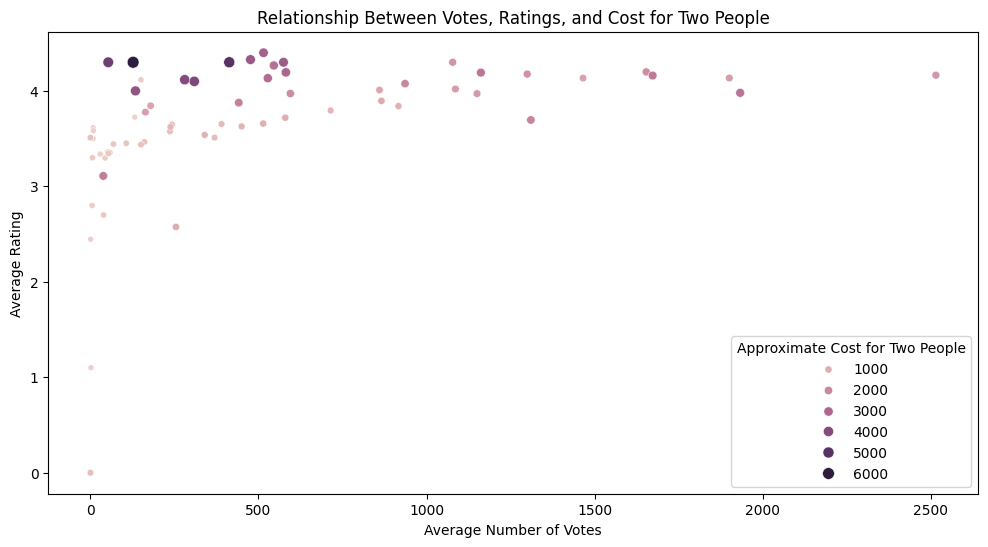

Correlation between average votes and average rating across cost categories: 0.41730739345262347


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by cost category and calculate mean votes and ratings
cost_groups = df.groupby('approx_cost(for two people)')
vote_rating_stats = cost_groups.agg({'votes': 'mean', 'rate': 'mean'})

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='votes', y='rate', data=vote_rating_stats, hue=vote_rating_stats.index, size=vote_rating_stats.index)
plt.title('Relationship Between Votes, Ratings, and Cost for Two People')
plt.xlabel('Average Number of Votes')
plt.ylabel('Average Rating')
plt.legend(title='Approximate Cost for Two People')
plt.show()

#Further analysis:  Correlation
correlation = vote_rating_stats['votes'].corr(vote_rating_stats['rate'])
print(f"Correlation between average votes and average rating across cost categories: {correlation}")

Insights:
--
- Votes vs. Ratings Correlation:
Restaurants with more votes generally tend to have higher ratings, indicating a positive correlation between customer engagement (votes) and perceived quality (ratings).
However, there are exceptions, as some restaurants with fewer votes still have high ratings, which could indicate niche, high-quality options.
- Cost Influence:
Higher-cost restaurants (larger dots) generally cluster around higher ratings (4.0+), suggesting that customers perceive these as premium experiences.
Lower-cost restaurants (smaller dots) show more spread in ratings, with some achieving excellent ratings despite affordability.
- Outliers:
A few restaurants with high costs and low votes highlight potential underperformance or a niche audience.

Useful Information:
--
- Pricing Strategy: Higher-cost restaurants may focus on enhancing ratings to justify their price points further.
- Marketing Focus: Restaurants with high ratings but fewer votes may benefit from marketing to reach a broader audience.

Scatter plot:
--
- Revealed nuanced relationships between multiple continuous variables.

Conclusion:
--
Higher-cost restaurants correlate with higher ratings, suggesting customer willingness to pay for premium experiences.
Lower-cost restaurants have a wider spread of ratings, indicating variable customer satisfaction.

**Research Question 2:** What are the trends in votes across different cities and how do they vary by restaurant type?

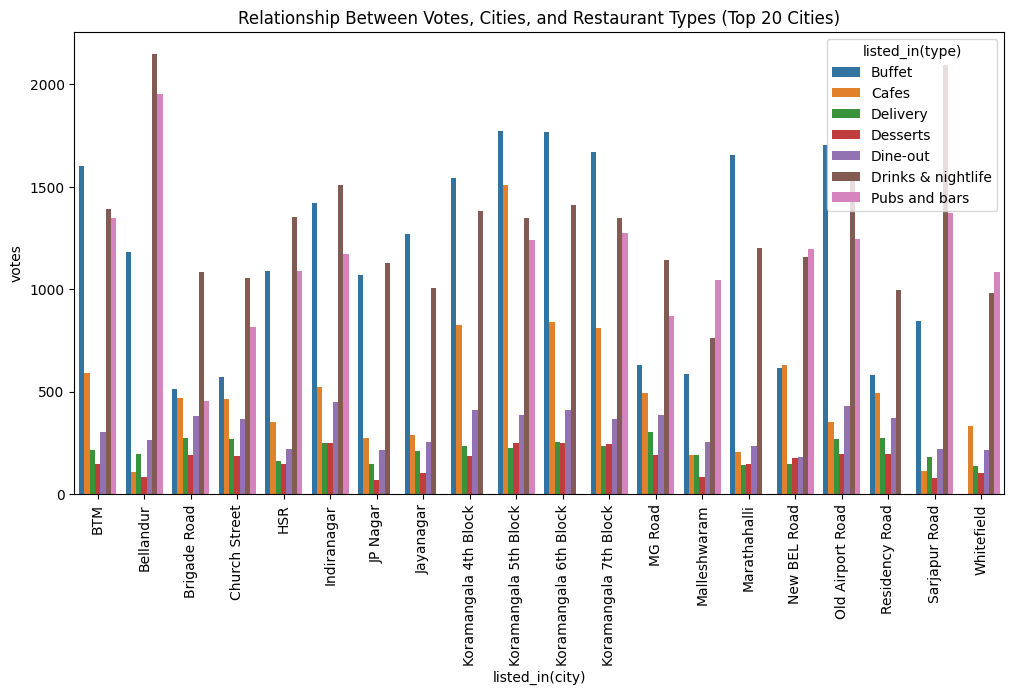

In [ ]:
# Group by city and type
city_type_data = df.groupby(['listed_in(city)', 'listed_in(type)']).agg({'rate': 'mean', 'votes': 'mean'}).reset_index()

# Get top 20 cities by average votes
top_20_cities = city_type_data.groupby('listed_in(city)')['votes'].mean().sort_values(ascending=False).head(20).index

# Filter data for top 20 cities
filtered_city_type_data = city_type_data[city_type_data['listed_in(city)'].isin(top_20_cities)]

# Visualize votes for top 20 cities
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_city_type_data, x='listed_in(city)', y='votes', hue='listed_in(type)')
plt.xticks(rotation=90)
plt.title('Relationship Between Votes, Cities, and Restaurant Types (Top 20 Cities)')
plt.show()

Insights:
--
- Popular Restaurant Types:
Drinks & nightlife and Pubs and bars consistently receive higher votes across many cities, suggesting they are more engaging or preferred by customers in those areas.
Delivery services tend to have relatively fewer votes compared to dining-out options, possibly because delivery is less experiential, and customers are less inclined to rate it.
- City-Specific Trends:
Certain areas like Koramangala 7th Block and Brigade Road show significantly higher overall votes compared to other cities, indicating a stronger customer base or greater popularity of restaurants in those locations.
Some areas like Old Airport Road and Sarjapur Road have lower votes across all restaurant types, potentially signaling less customer activity.
- Engagement Levels:
Restaurants offering experiential services (e.g., pubs, cafes) tend to attract more votes, highlighting customer engagement with these services.

Useful Information:
--
- Customer Behavior: Cities with higher votes can be targeted for expanding popular restaurant types.
- Restaurant Strategy: Enhancing services for Drinks & nightlife and Pubs and bars in cities with lower votes might improve customer engagement.

Bar Chart:
--
- Helped with outlier detection and understanding cost variability.

Conclusion:
--
Cities like Koramangala had the highest engagement for experiential services (Pubs, Nightlife), showing targetable customer preferences.

# **Ammar Hassona:**

:**Research Question 1:** How does the average cost for two affect the ratings of restaurants across different types?

0
0
0


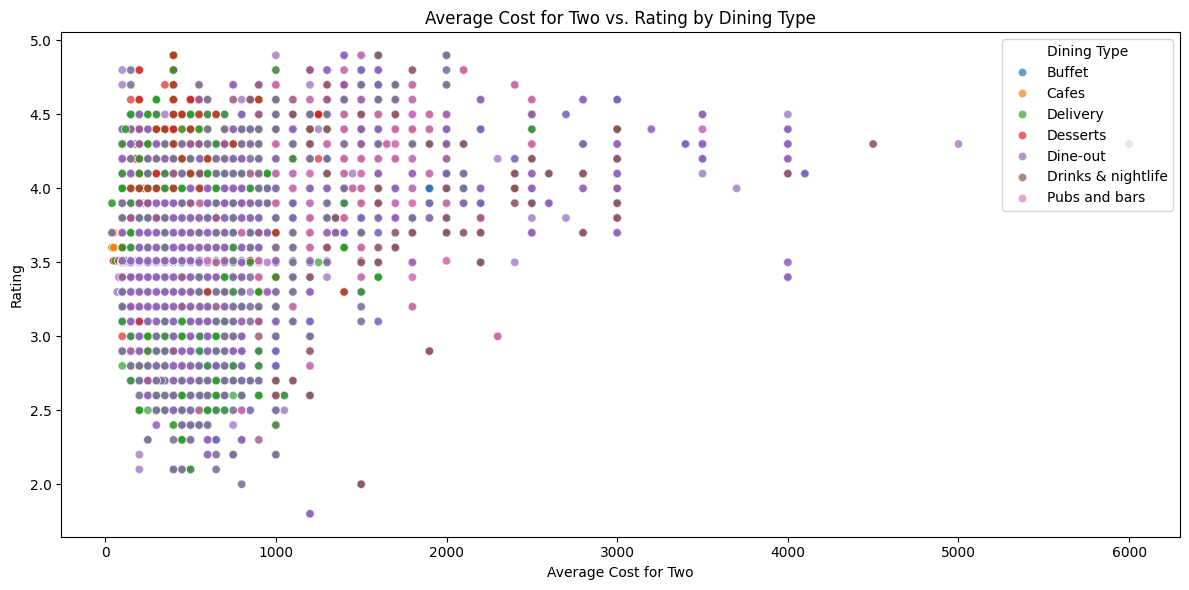

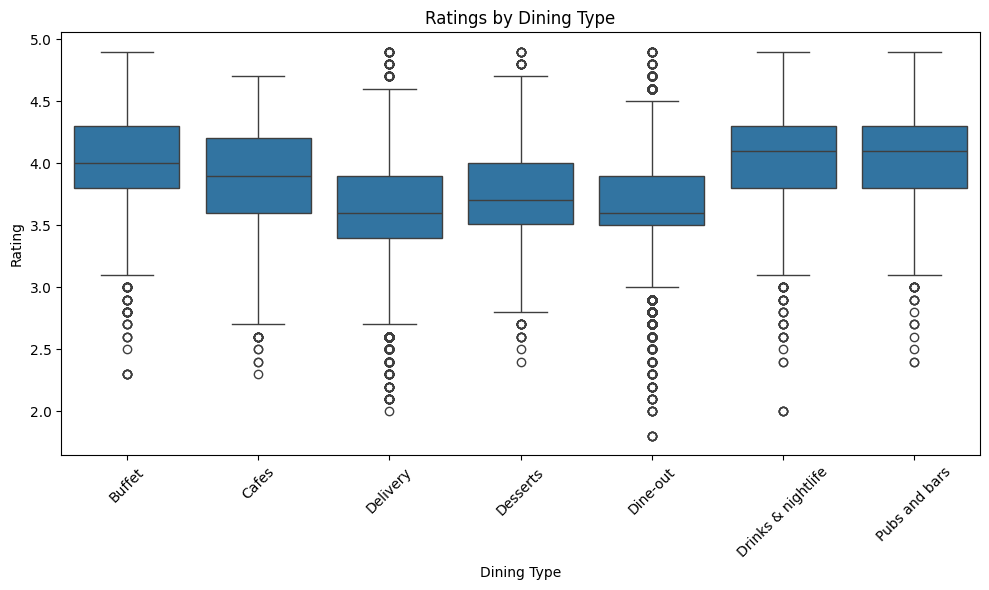

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# check that there are no na values in the features
print(df['approx_cost(for two people)'].isna().sum())
print(df['rate'].isna().sum())
print(df['listed_in(type)'].isna().sum())

# remove 0 ratings
df = df[df['rate'] > 0]

# Scatter plot: Cost for two vs. Rate
plt.figure(figsize = (12 , 6))
sns.scatterplot(data = df, x = 'approx_cost(for two people)' , y = 'rate' , hue = 'listed_in(type)' , alpha = 0.7)
plt.title('Average Cost for Two vs. Rating by Dining Type')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.legend(title='Dining Type', loc='upper right')
plt.tight_layout()
plt.show()

# Box plot: Ratings across different dining types
plt.figure(figsize = (10 , 6))
sns.boxplot(data = df , x = 'listed_in(type)' , y = 'rate')
plt.title('Ratings by Dining Type')
plt.xlabel('Dining Type')
plt.ylabel('Rating')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

based on the following visualizations:
---
Scatter Plot -
we can see that the average cost for two ranged, with the majority of the ratings being approx. between 0 -1800 for the cost. the ratings ranged all the wat from 2-5, indicating that the cheaper meals didn't have a significant affect on the overall ratings for all of the dining types.

a dining type which was very visible in the scatter plot is the 'Dine-Out' restaurants.

another noticable point is with the outliers. as the average cost for two increased, the ratings were higher. this could indicate that the cost of a dining type had a significant affect on the overall experience of the diners, hence, the higher ratings for the restaurants at a higher cost.

---
Box Plot -
the box plots for all of the dining types had similar ratings for the lower and quartiles. in addition, the median ratings for the restaurant types were all somewhat similar.

the main noticable difference between each dining type's box plot are the outliers.

dining types like desserts, cafes, and buffets had less outliers than the other dining types. which might indicate a more consistent experience in these dining types as the ratings for these dining types were all between the box plot values, barring a few outliers.

dining types like dine-out, delivery, and drinks & nightlife had more outliers than the other dining types. which might indicate a less consistent experience in these dining types as the ratings were not consistent.

the dine-out dining type had the most outliers, with many ratings lower than the lower quartile, which means a lot of diners had a poor experience. in addition, there were some ratings above the upper quartile, which means some diners had an above-average experience.

---
final opinion -
higher costs may contribute to better ratings, especially for higher-end dining experiences, but this effect is not consistent across all dining types. the consistency and variability of ratings across dining types show important differences in customer expectations and satisfaction with various dining options.

**Question 2:** Does the location of a restaurant influence its average rating?

0
0


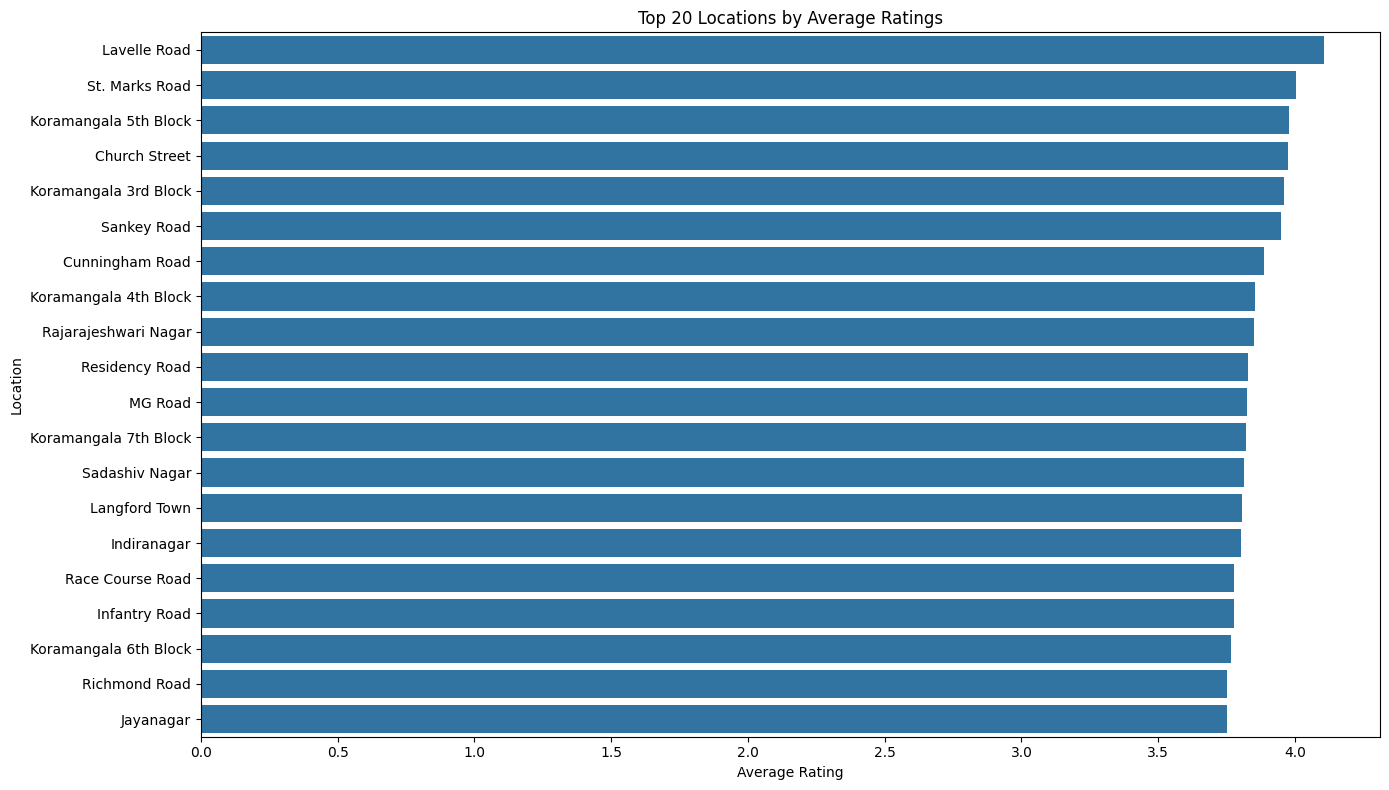

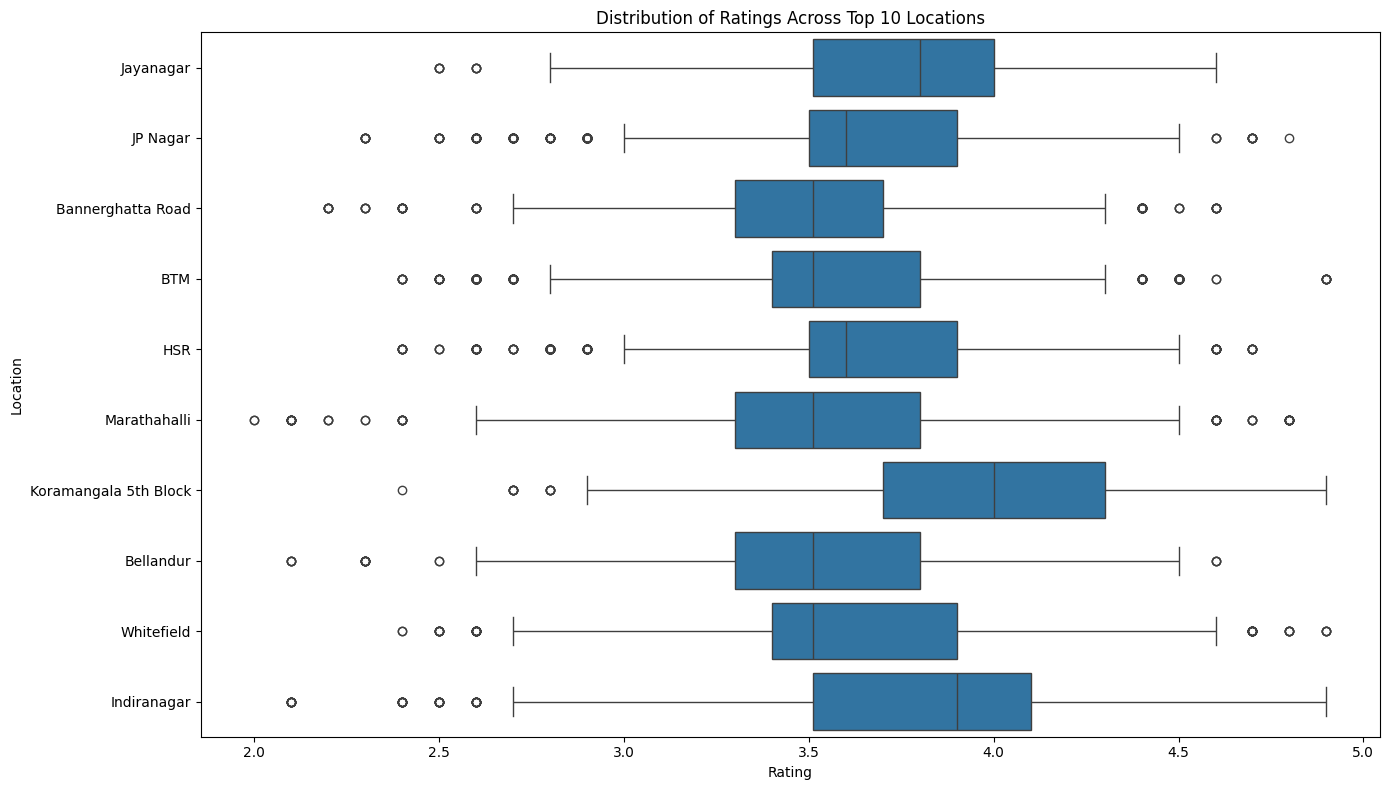

In [ ]:
# check for na values
print(df['location'].isna().sum())
print(df['rate'].isna().sum())

# calculate average rating for each location using the groupby function
location_ratings = df.groupby('location')['rate'].mean().sort_values(ascending = False).reset_index()

# bar plot for average ratings by location
plt.figure(figsize = (14 , 8))
top_locations = location_ratings.head(20)  # show top 20 locations
sns.barplot(data = top_locations , x = 'rate' , y = 'location')
plt.title('Top 20 Locations by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

# Select top 10 locations by count for easier visualization
top_10_locations = df['location'].value_counts().head(10).index
filtered_df = df[df['location'].isin(top_10_locations)]

# box plot for ratings across top 10 locations
plt.figure(figsize = (14 , 8))
sns.boxplot(data = filtered_df , x = 'rate' , y = 'location')
plt.title('Distribution of Ratings Across Top 10 Locations')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

from the visualizations, we can see that location has a slight influence on the ratings. some areas such as Lavelle Road and St. Marks Road show consistently higher ratings. areas like Jayanagar have a wider spread, indicating less consistency in the quality of restaurants in that location.

this variation in ratings based on location can be important when considering customer expectations, dining experience consistency, and the types of restaurants located in these areas.

# **Ali Sherif:**

**Research Question 1:** How do restaurant characteristics (online ordering, table booking, and restaurant type) influence customer ratings and engagement (votes) across different price ranges?

<ipython-input-24-a95be786976d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = pd.qcut(df['approx_cost(for two people)'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
<ipython-input-24-a95be786976d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_stats = df.groupby(['price_range', 'online_order', 'book_table', 'listed_in(type)'])[['rate', 'votes']].mean().reset_index()
<ipython-input-24-a95be786976d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pric

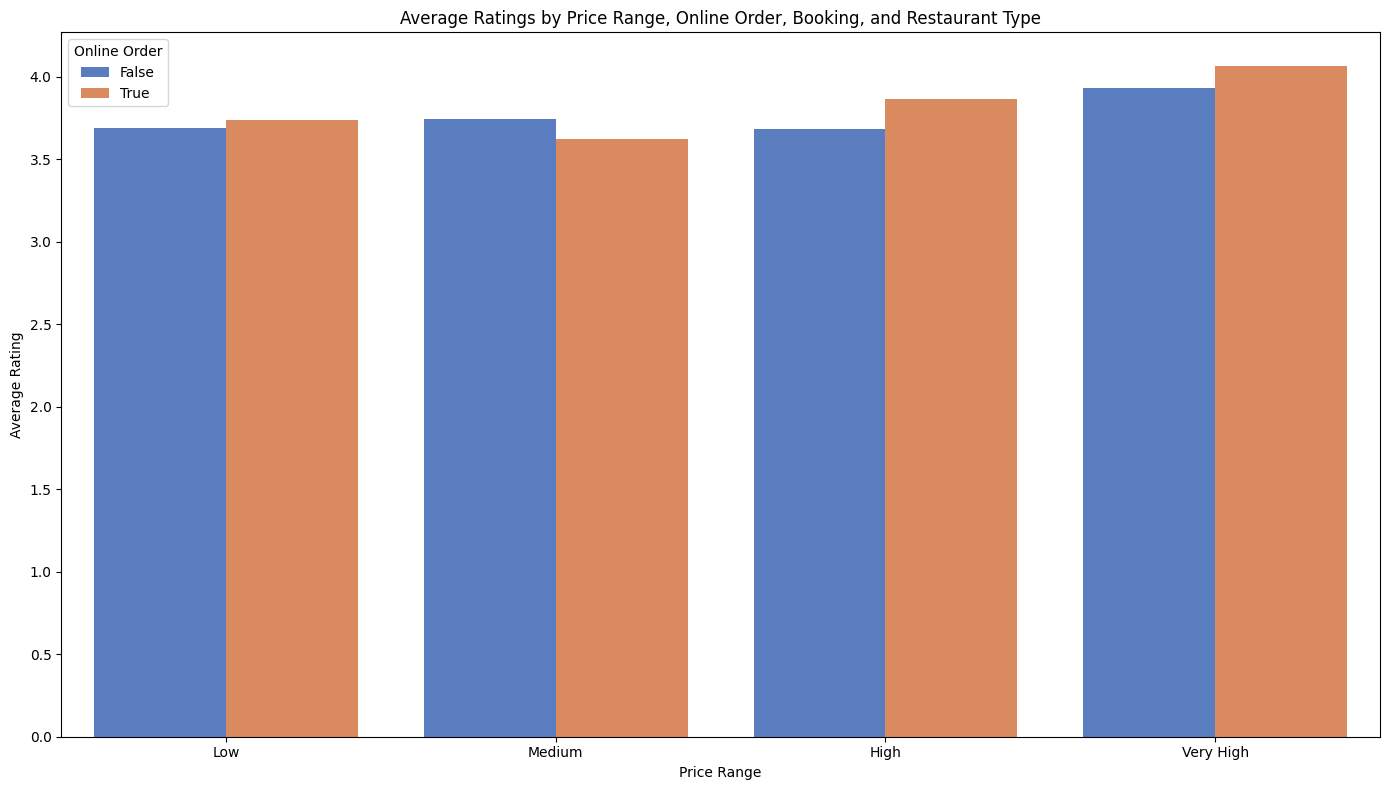

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define price ranges (adjust based on your data distribution)
df['price_range'] = pd.qcut(df['approx_cost(for two people)'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Group data by price range and other characteristics, calculating mean rate and votes
price_range_stats = df.groupby(['price_range', 'online_order', 'book_table', 'listed_in(type)'])[['rate', 'votes']].mean().reset_index()

# Visualization with a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=price_range_stats, x='price_range', y='rate', hue='online_order', palette='muted', ci=None)  # Adjust hue for other features
plt.title('Average Ratings by Price Range, Online Order, Booking, and Restaurant Type')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.legend(title='Online Order')
plt.tight_layout()
plt.show()

## **General Insights**
## Price Range and Ratings:

 - Restaurants in the "Very High" price range consistently receive the highest average ratings, regardless of whether online ordering is available. The "Low" price range shows a smaller difference in ratings compared to higher price ranges.


 - As for Online Ordering, Across all price ranges, restaurants offering online ordering generally receive slightly higher average ratings than those without. This trend suggests that online ordering enhances customer satisfaction, possibly due to convenience.


 - For Customer Engagement, Higher price ranges ("High" and "Very High") appear to attract more positive ratings, which could indicate that customers are willing to pay more for better service and overall dining experiences.

 ## **Plot**
 - The Plot used is a **Bar Chart** as it provides the best and most effective visual representation of the research question. Efficiently Comparing between the values and providing valuable insight.

**Research Question 2:** What is the relationship between
cuisines offered and the average cost for two people in different types of restaurants?


<ipython-input-25-7d6b4df63a18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='cuisines', y='approx_cost(for two people)', palette="muted")


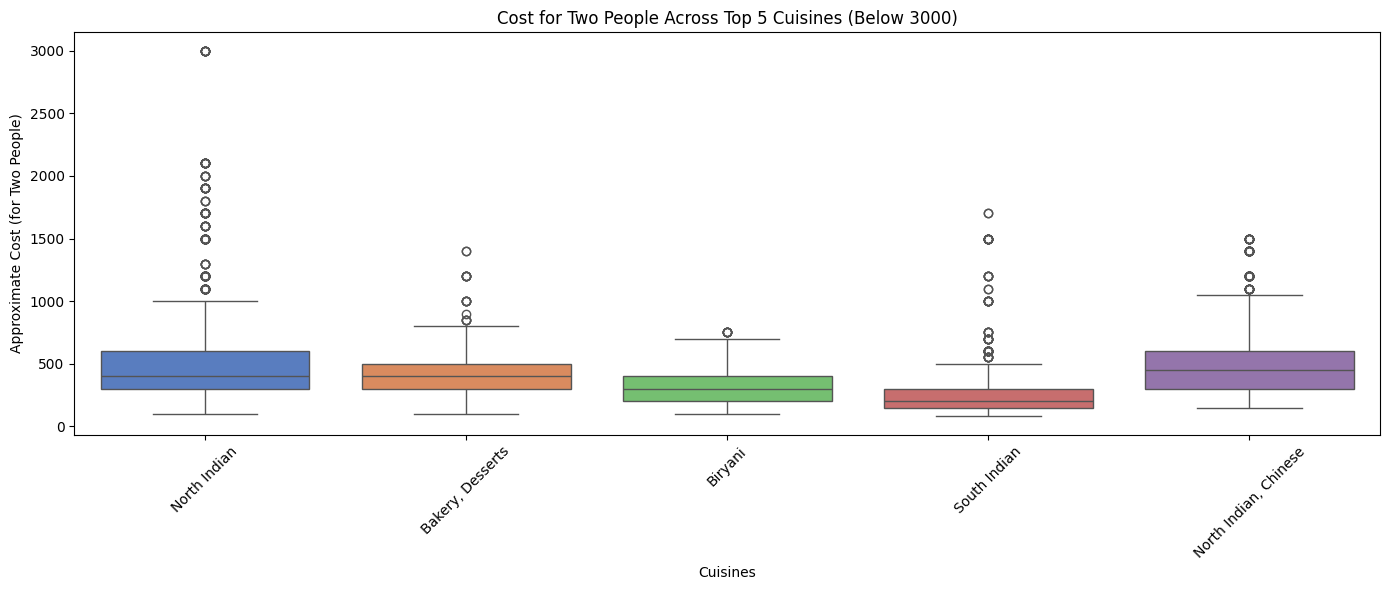

<ipython-input-25-7d6b4df63a18>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_rest_type, x='listed_in(type)', y='approx_cost(for two people)', palette="cool")


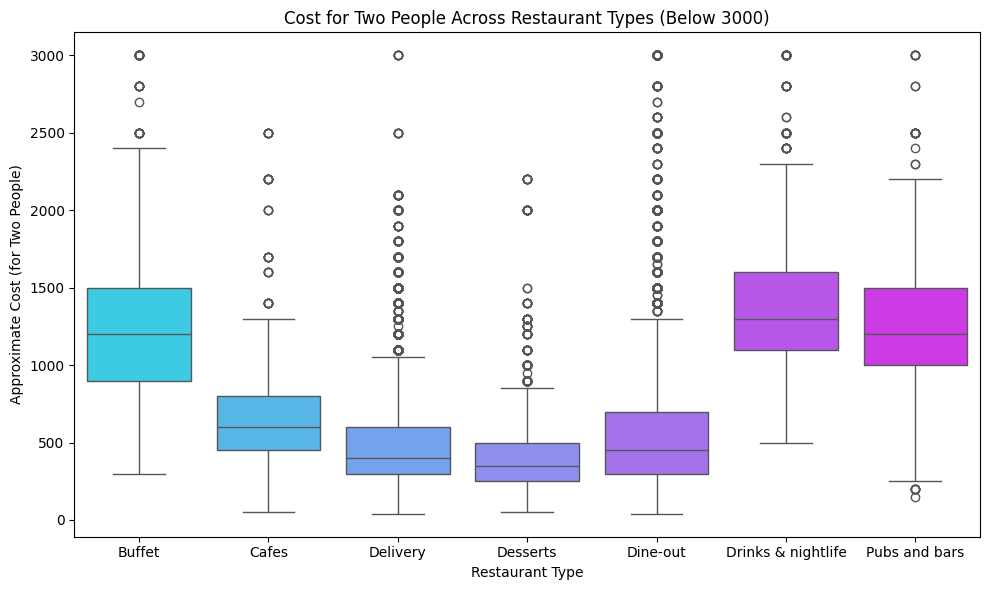

In [ ]:
# Filter for costs below ₹2000
filtered_df = df[df['approx_cost(for two people)'] <= 3000]

# Top 10 cuisines analysis (with filtered costs)
top_cuisines = filtered_df['cuisines'].value_counts().nlargest(5).index
filtered_data = filtered_df[filtered_df['cuisines'].isin(top_cuisines)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_data, x='cuisines', y='approx_cost(for two people)', palette="muted")
plt.title('Cost for Two People Across Top 5 Cuisines (Below 3000)')
plt.ylabel('Approximate Cost (for Two People)')
plt.xlabel('Cuisines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 restaurant types analysis (with filtered costs)
top_rest_types = filtered_df['listed_in(type)'].value_counts().nlargest(10).index
filtered_data_rest_type = filtered_df[filtered_df['listed_in(type)'].isin(top_rest_types)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_rest_type, x='listed_in(type)', y='approx_cost(for two people)', palette="cool")
plt.title('Cost for Two People Across Restaurant Types (Below 3000)')
plt.ylabel('Approximate Cost (for Two People)')
plt.xlabel('Restaurant Type')
plt.tight_layout()
plt.show()


## **General Insights**



*   Cuisine Type and Cost:

  - North Indian, North Indian & Chinese, and Bakery & Desserts have slightly higher median costs compared to South Indian and Biryani, suggesting a perceived premium or broader appeal.

    - South Indian and Biryani have lower median costs, indicating they are more budget-friendly options.

Cost Variability:

   - North Indian cuisine shows the greatest variability, highlighting its adaptability across different price segments.
   - South Indian and Biryani are relatively consistent, catering to a cost-conscious customer base.
Outliers:

North Indian cuisine has the most high-cost outliers, likely representing fine-dining options.
Bakery & Desserts also exhibit some high-cost outliers, possibly reflecting specialty or artisan offerings.

*   Restaurant Type and Cost:

  -   Buffets, Drinks & nightlife, and Pubs and bars have the highest median costs for two people, indicating these services cater to premium dining experiences.
  -Delivery, Desserts, and Cafes have significantly lower median costs, aligning with casual or convenience-focused dining.

Cost Variability:

  - Drinks & nightlife and Pubs and bars exhibit a wider range of costs, suggesting variability in menu pricing and customer spending preferences.
Delivery services and cafes show a more concentrated cost range, likely due to standardized pricing.

Outliers:

  - All categories display outliers, but Buffets, Drinks & nightlife, and Pubs and bars have a notable number of high-cost outliers, reflecting niche or luxury offerings.




# **Abdelrahman Ahmed:**

**Research Question 1:** How do price range and the number of cuisines offered by a restaurant affect the rating, as measured by average ratings?

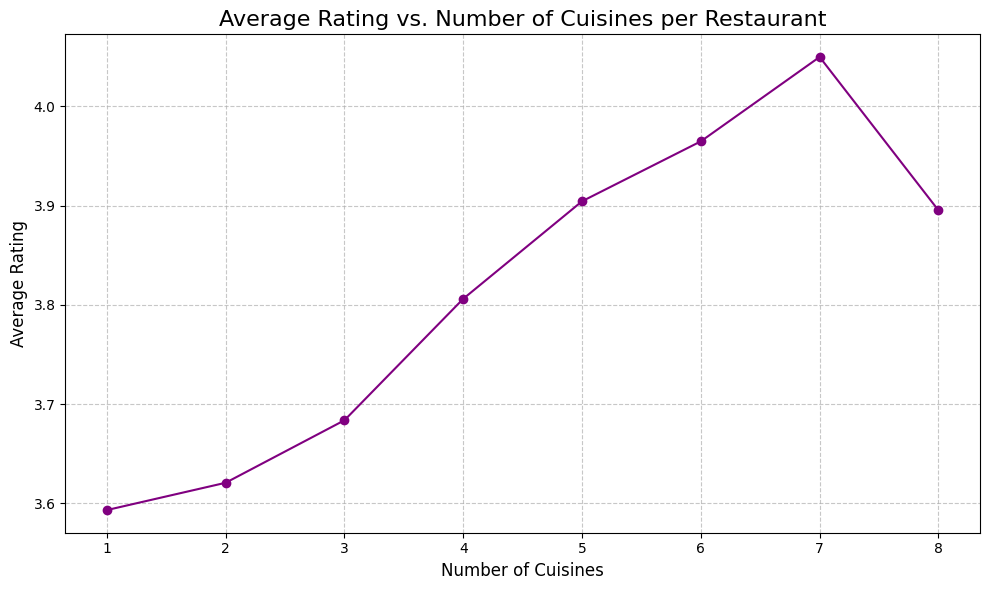

<ipython-input-81-2c0e35a165eb>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['price_range', 'num_cuisines'])['rate'].mean().reset_index()


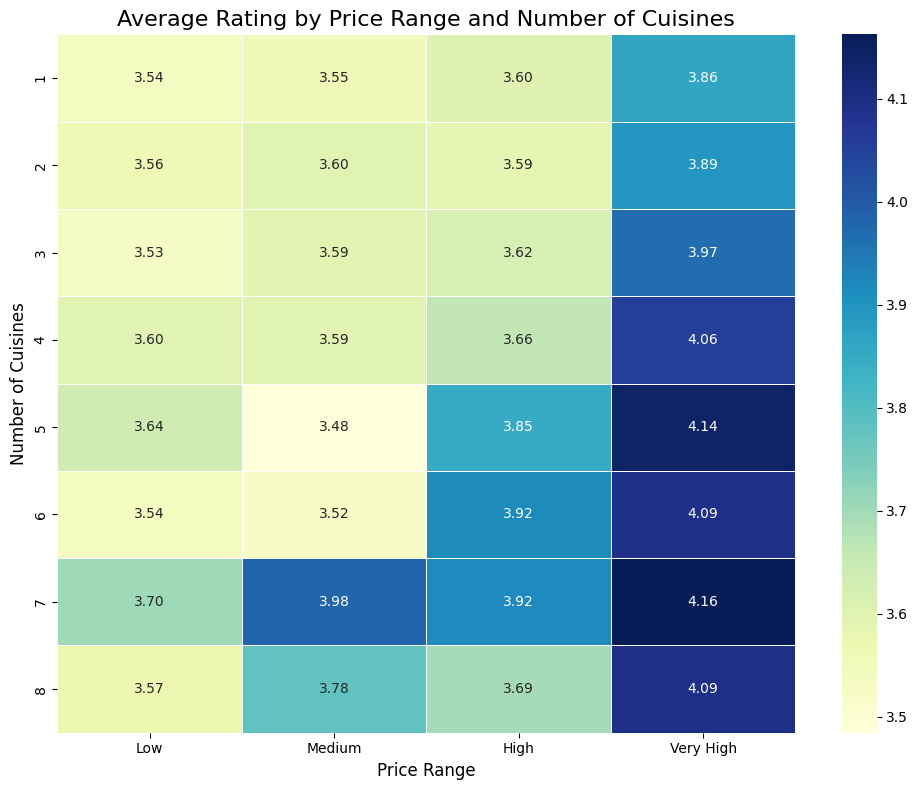

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

rating_by_num_cuisines = df.groupby('num_cuisines')['rate'].mean()

plt.figure(figsize=(10, 6))
rating_by_num_cuisines.plot(kind='line', marker='o', color='purple')
plt.title('Average Rating vs. Number of Cuisines per Restaurant', fontsize=16)
plt.xlabel('Number of Cuisines', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


grouped = df.groupby(['price_range', 'num_cuisines'])['rate'].mean().reset_index()

pivot_table = grouped.pivot(index='num_cuisines', columns='price_range', values='rate')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Average Rating by Price Range and Number of Cuisines', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Cuisines', fontsize=12)
plt.tight_layout()
plt.show()

# **General Insights**

**Price Range and Ratings:**

Higher Price, Higher Ratings: There's a clear positive correlation between the price range of a restaurant and its average rating. Restaurants in the "Very High" price range generally receive the highest average ratings, followed by "High," "Medium," and then "Low." This suggests that customers are willing to pay more for a higher quality dining experience.

Number of Cuisines and Ratings:  The number of cuisines offered by a restaurant seems to have a less straightforward impact on ratings. While there's some variation, it's not as pronounced as the price range. Restaurants with a wider range of cuisines might appeal to a broader customer base, potentially leading to a wider range of ratings.

---
**Plot:**

The plot chosen for this visualization is a heatmap. This is because it allows for the best and most effective visual representation of the research question at hand, which is to efficiently compare between the Price range and Number of cuisines and their average rating.

**Reasrch Question 2:** how does the Price range and type of the restaurent affect Numbers of cuisines that the restaurent offer?

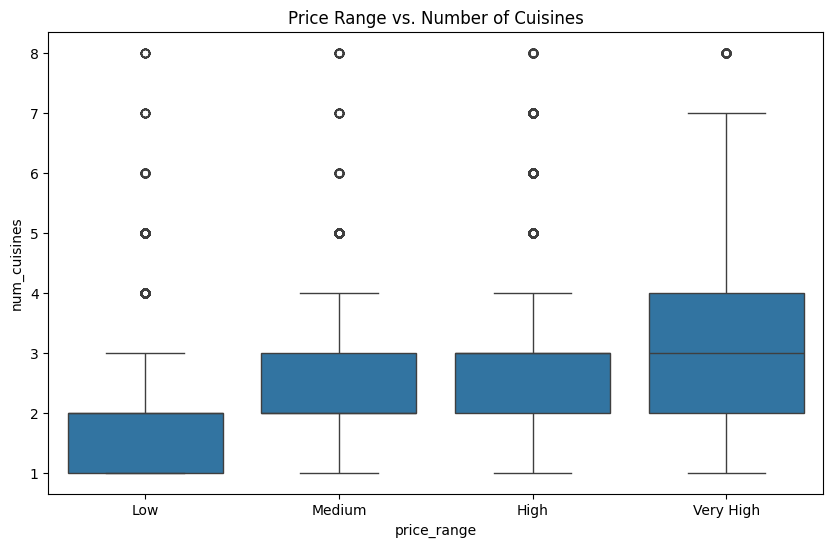

<ipython-input-82-6fd25d54cca4>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='listed_in(type)', columns='price_range', values='num_cuisines', aggfunc='mean')


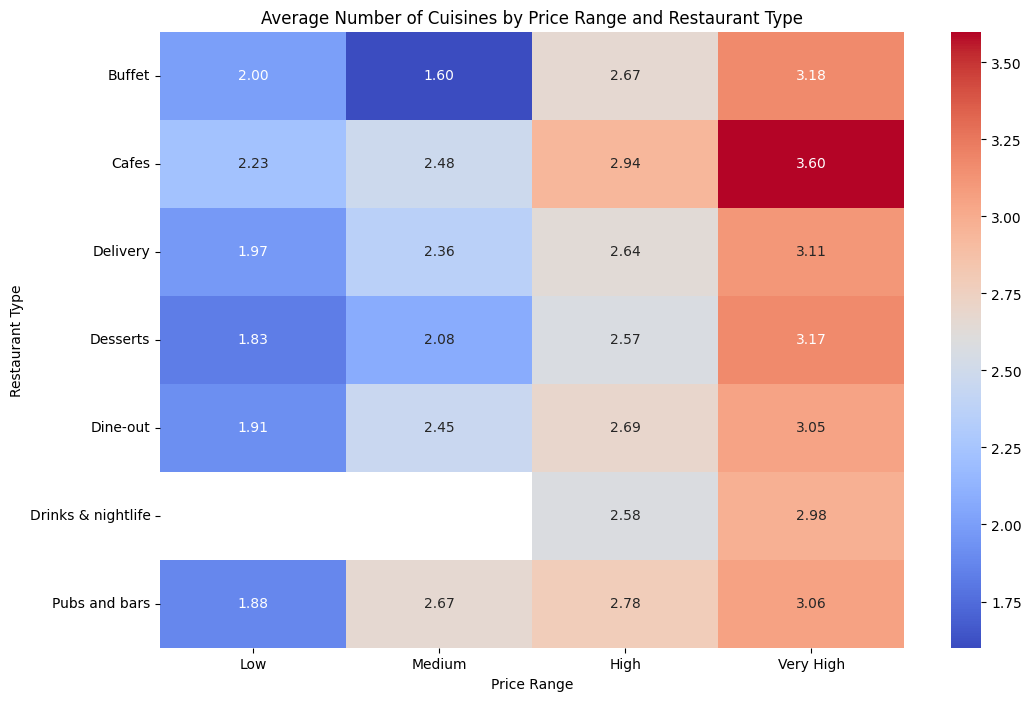

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='num_cuisines', data=df)
plt.title('Price Range vs. Number of Cuisines')
plt.show()

pivot_df = df.pivot_table(index='listed_in(type)', columns='price_range', values='num_cuisines', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Number of Cuisines by Price Range and Restaurant Type')
plt.xlabel('Price Range')
plt.ylabel('Restaurant Type')
plt.show()


# **General Insights**

**Price Range and Number of Cuisines:**

Higher Price, More Cuisines: There's a clear positive correlation between the price range of a restaurant and the average number of cuisines offered. Restaurants in the "Very High" price range generally offer the highest number of cuisines, followed by "High," "Medium," and then "Low." This suggests that customers at higher-end establishments expect a wider variety of culinary options.

**Cafes and Dine-Out:**

These restaurant types consistently offer a wider range of cuisines across all price ranges, suggesting a focus on diverse cuisine selections.

**Drinks and Nighrlife:**

Thisrestaurent type can be seen to have no "Low" or "Medium" price ranges, therefore they are usually on the more expensive side.

---

**Plot:**

The plot chosen for this visualization is a heatmap. This is because it allows for the best and most effective visual representation of the research question at hand, which is to efficiently compare between the Price range and the restaurent type and their correlation with the number of cuisines.